In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Past Data. Each element of this list represents how many "items" were completed in each given day/sprint/timebox.
completed = [4,2,7,6,3,3,4,5,4,7,7,0,1,3,2,1,2,1,1,7]

## Start to set up our Monte Carlo Simulation
backlog_size = 50  # Items left in backlog
num_simulations = 1000  # Number of simulation runs

In [15]:
# Zero out an array with a row for each iteration of the simulation.
iterations_to_completion = np.zeros(num_simulations)

## Run our simulations
for i in range(num_simulations):
    # Initialize the backlog for this iteration
    remaining_backlog = backlog_size
    iteration_count = 0

    while remaining_backlog > 0:
        # Randomly select the number of stories completed in a sprint
        stories_completed = np.random.choice(completed)
        
        # Remove those stories from the backlog.
        remaining_backlog -= stories_completed
        iteration_count += 1

    iterations_to_completion[i] = iteration_count

# iterations_to_completion now contains the number of sprints needed for each simulation run


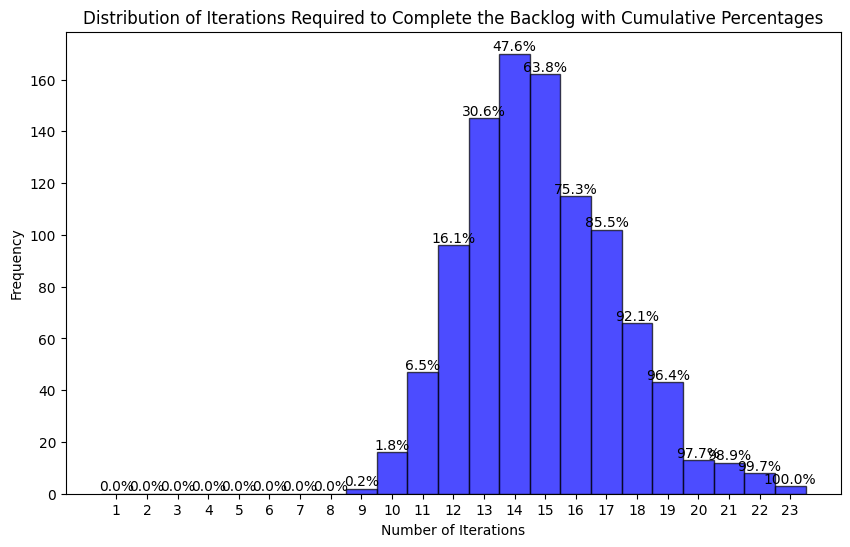

In [16]:
## Analysis
# Calculate histogram data
hist, bins = np.histogram(iterations_to_completion, bins=range(1, int(max(iterations_to_completion)) + 2))

# Calculate cumulative percentages
cumulative_counts = np.cumsum(hist)
total_counts = cumulative_counts[-1]
cumulative_percentages = cumulative_counts / total_counts * 100

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(iterations_to_completion, bins=bins, alpha=0.7, color='blue', edgecolor='black', align='left')

# Annotate with cumulative percentages
for i in range(len(cumulative_percentages)):
    plt.text(bins[i], hist[i], f'{cumulative_percentages[i]:.1f}%', ha='center', va='bottom')

plt.title('Distribution of Iterations Required to Complete the Backlog with Cumulative Percentages')
plt.xlabel('Number of Iterations')
plt.ylabel('Frequency')
plt.xticks(range(1, int(max(iterations_to_completion)) + 1))  # Set x-axis ticks to show every sprint number
plt.show()